### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 8


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ву Ньят Нам
##### Группа:   НПИбд-01-17


## Москва 2020

### Вариант № 28


Hepatitis Data Set  

Название файла: hepatitis.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/ 

Предиктор: ALK PHOSPHATE (столбец No 16) 

Зависимая переменная: ALBUMIN (столбец No 18)  

### 1. Считайте заданный набор данных из репозитария UCI (независимую и зависимую переменные).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [4]:
df = df.loc[:, [15, 17]].rename(columns={15: 'ALK PHOSPHATE', 17: 'ALBUMIN'})

In [5]:
df

,ALK PHOSPHATE,ALBUMIN
0,85,4.0
1,135,3.5
2,96,4.0
3,46,4.0
4,?,4.0
...,...,...
150,?,3.3
151,126,4.3
152,75,4.1
153,81,4.1


### 2. Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите данные.

In [6]:
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 154
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ALK PHOSPHATE  120 non-null    float64
 1   ALBUMIN        120 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


In [9]:
df.isna().any().any()

False

### 3. Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная).

In [10]:
df = df.sort_values(by='ALK PHOSPHATE')

In [11]:
mms = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(mms.fit_transform(df))
X = df.iloc[:, 0]
y = df.iloc[:, 1]

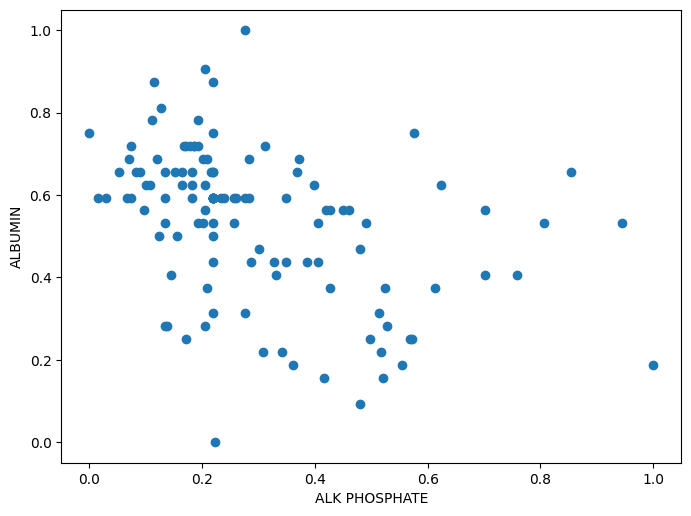

In [12]:
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel('ALK PHOSPHATE')
plt.ylabel('ALBUMIN')
plt.scatter(X, y)

### 4. Разбейте набор данных на обучающую и тестовую выборки.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Постройте регресоры на базе следующих моделей регрессии:

### 6. При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).

In [14]:
X_train = np.reshape(X_train.values, (-1, 1))
y_train = np.reshape(y_train.values, (-1, 1))
X_test = np.reshape(X_test.values, (-1, 1))
y_test = np.reshape(y_test.values, (-1, 1))

#### линейной регрессии (LinearRegression)

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

#### полиномиальной регрессии (PolynomialFeatures+LinearRegression)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

param_grid = [
    {
        'poly__degree': np.arange(2, 10, 2),
        'poly__include_bias': [True, False],
        'poly__order': ['C', 'F']
    },
]

poly_gs = GridSearchCV(poly_reg, param_grid, n_jobs=-1, verbose=1)
poly_gs.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


In [17]:
print(f'Best Params: {poly_gs.best_params_}\nBestScore: {poly_gs.best_score_}')

Best Params: {'poly__degree': 6, 'poly__include_bias': False, 'poly__order': 'C'}
BestScore: 0.08980284090016558


#### стохастического градиентного спуска (SGDRegressor)

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

param_grid = [
    {
        'penalty': ['l2', 'l1'],
        'alpha': np.linspace(0.00001, 1, 10),
    },
    {
        'penalty': ['elasticnet'],
        'alpha': np.linspace(0.00001, 1, 10),
        'l1_ratio': np.linspace(0.15, 1, 10),
    },
]

sgd_gs = GridSearchCV(sgd_reg, param_grid, n_jobs=-1, verbose=1)
sgd_gs.fit(X_train, np.ravel(y_train));

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.1s finished


In [19]:
print(f'Best Params: {sgd_gs.best_params_}\nBestScore: {sgd_gs.best_score_}')

Best Params: {'alpha': 0.11112, 'l1_ratio': 0.6222222222222222, 'penalty': 'elasticnet'}
BestScore: -0.1307291668093876


#### гребневой регрессии (Ridge)

In [20]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()

param_grid = [
    {
        'alpha': np.linspace(0.00001, 1, 10),
        'solver': ['svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag']
    },
]

ridge_gs = GridSearchCV(ridge_reg, param_grid, n_jobs=-1, verbose=1)
ridge_gs.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.0s finished


In [21]:
print(f'Best Params: {ridge_gs.best_params_}\nBestScore: {ridge_gs.best_score_}')

Best Params: {'alpha': 0.44445, 'solver': 'sag'}
BestScore: 0.09576244624488577


#### лассо регрессии (Lasso)

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

param_grid = [
    {
        'alpha': np.linspace(0.00001, 1, 10),
        'tol': np.linspace(0.00001, 1, 10),
        'selection': ['cyclic', 'random']
    },
]

lasso_gs = GridSearchCV(lasso_reg, param_grid, n_jobs=-1, verbose=1)
lasso_gs.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [23]:
print(f'Best Params: {lasso_gs.best_params_}\nBestScore: {lasso_gs.best_score_}')

Best Params: {'alpha': 1e-05, 'selection': 'cyclic', 'tol': 1e-05}
BestScore: 0.0783611136600532


#### регрессии эластичная сеть (ElasticNet)

In [24]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet()

param_grid = [
    {
        'alpha': np.linspace(0.00001, 1, 10),
        'tol': np.linspace(0.00001, 1, 10),
        'l1_ratio': np.linspace(0.15, 1, 10),
    },
]

elastic_gs = GridSearchCV(elastic_reg, param_grid, n_jobs=-1, verbose=1)
elastic_gs.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 3447 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 4977 out of 5000 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    0.8s finished


In [25]:
print(f'Best Params: {elastic_gs.best_params_}\nBestScore: {elastic_gs.best_score_}')

Best Params: {'alpha': 1e-05, 'l1_ratio': 1.0, 'tol': 1e-05}
BestScore: 0.0783611136600532


#### регрессии на основе метода ближайших соседей (KNeighborsRegressor)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1,6)]
    }
]

knn_gs = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
knn_gs.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [27]:
print(f'Best Params: {knn_gs.best_params_}\nBestScore: {knn_gs.best_score_}')

Best Params: {'n_neighbors': 8, 'weights': 'uniform'}
BestScore: 0.02621761671604448


#### регрессии на основе деревьев решений (DecisionTreeRegressor)

In [28]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

param_grid = [
    {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'splitter': ['best', 'random'],
        'max_depth': np.arange(2, 20, 2),
        'min_samples_leaf': np.arange(1, 10),
        'max_features': np.arange(1, 20)
    },
]

dt_gs = GridSearchCV(dt_reg, param_grid, n_jobs=-1, verbose=1)
dt_gs.fit(X_train, y_train);

Fitting 5 folds for each of 9234 candidates, totalling 46170 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 36072 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 46170 out of 46170 | elapsed:   20.3s finished


In [29]:
print(f'Best Params: {dt_gs.best_params_}\nBestScore: {dt_gs.best_score_}')

Best Params: {'criterion': 'mse', 'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 9, 'splitter': 'random'}
BestScore: 0.1599657614284089


#### регрессии на основе метода опорных векторов (SVR)

In [30]:
from sklearn.svm import SVR

sv_reg = SVR()

param_grid = [
    {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'degree': np.arange(1, 10),
        'gamma': np.linspace(0.001, 1, 10),
        'tol': np.linspace(0.00001, 1, 10),
    },
]

sv_gs = GridSearchCV(sv_reg, param_grid, n_jobs=-1, verbose=1)
sv_gs.fit(X_train, np.ravel(y_train));

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed:    2.9s finished


In [31]:
print(f'Best Params: {sv_gs.best_params_}\nBestScore: {sv_gs.best_score_}')

Best Params: {'degree': 1, 'gamma': 0.334, 'kernel': 'rbf', 'tol': 0.11112}
BestScore: 0.14601076403746113


### 7. Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду для графика.

In [32]:
x = np.reshape(np.linspace(0, 1, len(df)), (-1, 1))

In [33]:
models = {'lin_reg' : lin_reg,
          'poly' : poly_gs,
          'sgd' : sgd_gs,
          'ridge' : ridge_gs,
          'lasso' : lasso_gs,
          'elastic' : elastic_gs,
          'knn': knn_gs,
          'dt' : dt_gs,
          'sv' : sv_gs,
}

In [34]:
predictions = {'lin_reg' : lin_reg.predict(x),
               'poly' : poly_gs.predict(x),
               'sgd' : sgd_gs.predict(x),
               'ridge' : ridge_gs.predict(x),
               'lasso' : lasso_gs.predict(x),
               'elastic' : elastic_gs.predict(x),
               'knn': knn_gs.predict(x),
               'dt' : dt_gs.predict(x),
               'sv' : sv_gs.predict(x),
}

In [35]:
df_test = pd.DataFrame(zip(np.ravel(X_test), np.ravel(y_test)), columns=['ALK PHOSPHATE', 'ALBUMIN'])

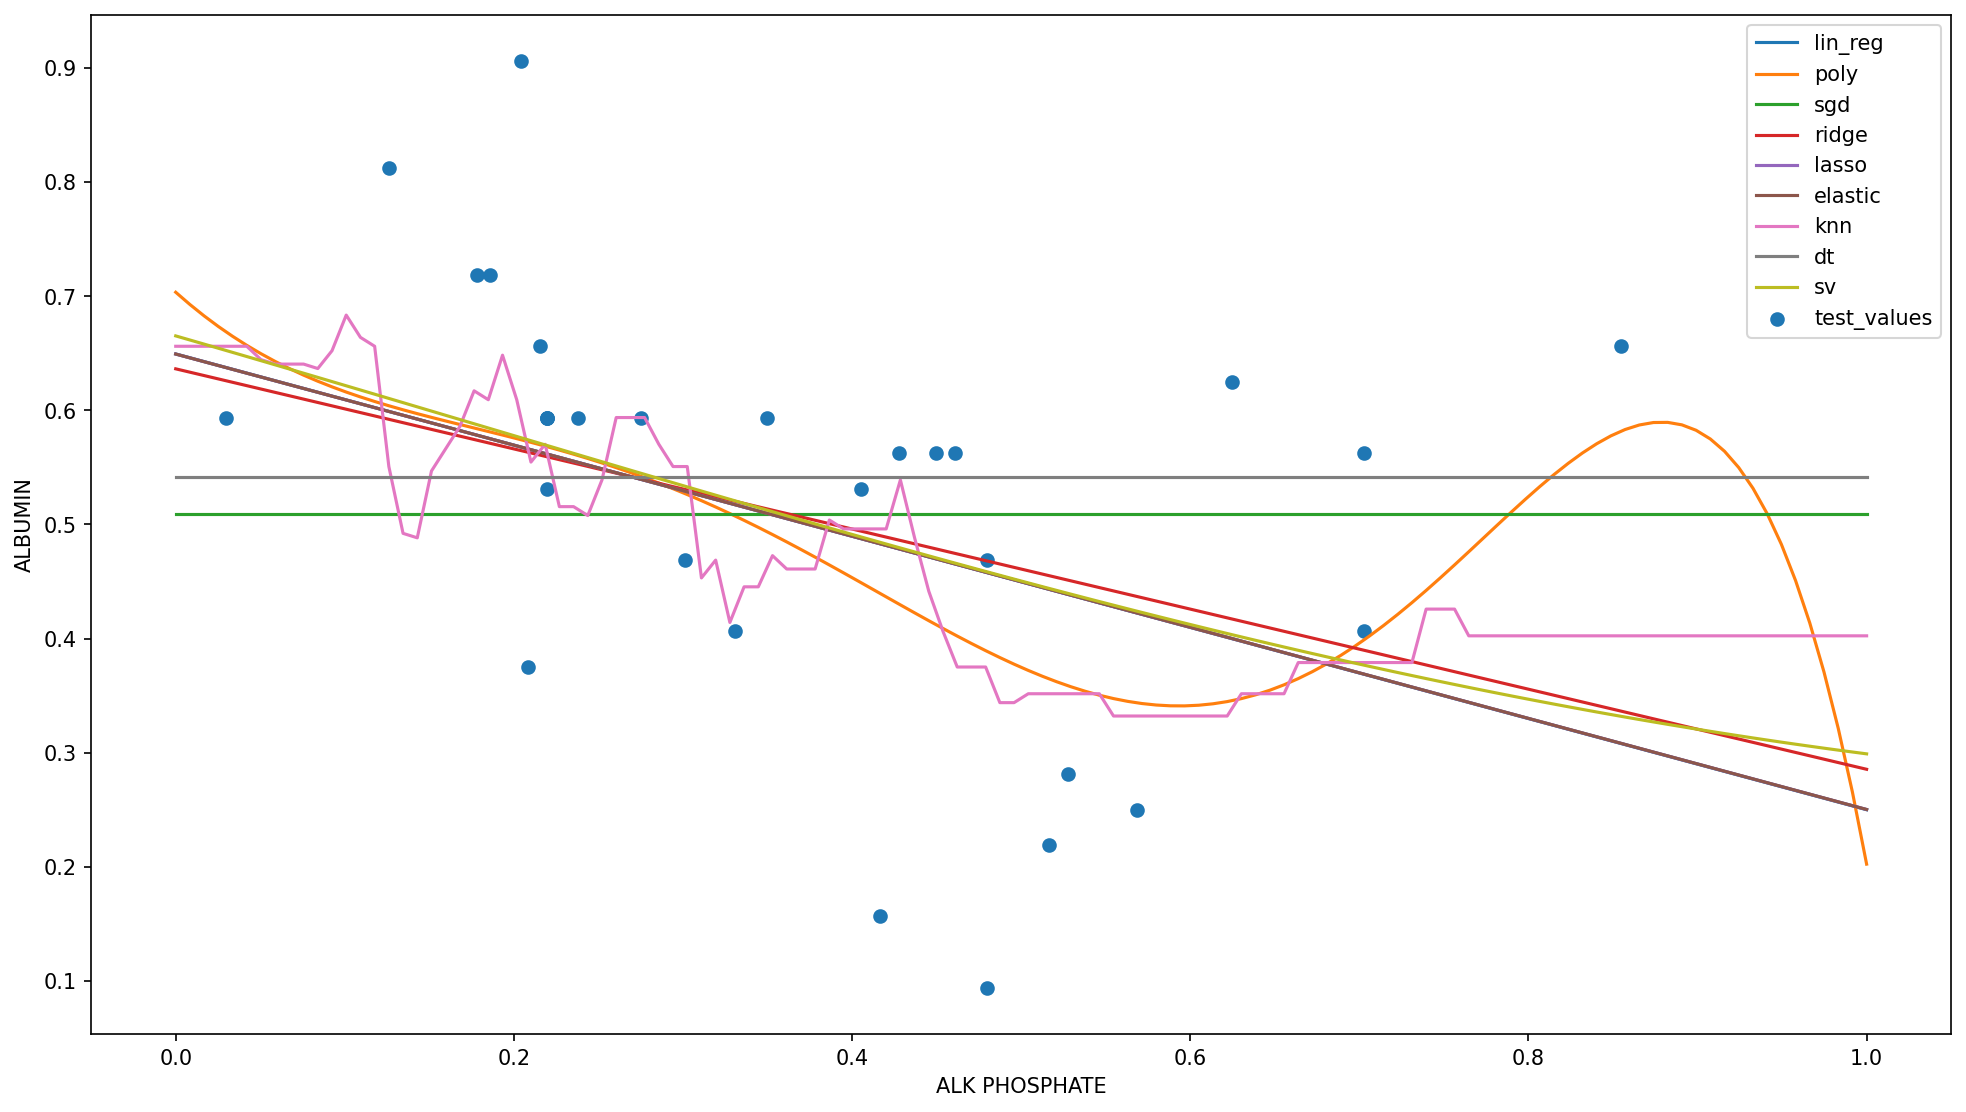

In [36]:
plt.figure(figsize=(16, 9), dpi=150)
plt.xlabel('ALK PHOSPHATE')
plt.ylabel('ALBUMIN')
for prediction in predictions.items():
    plt.plot(x, prediction[1], label=prediction[0])
plt.scatter(df_test.loc[:, 'ALK PHOSPHATE'], df_test.loc[:, 'ALBUMIN'], label='test_values')
plt.legend()

### 8. Определите лучший регрессор по показателю коэффициент детерминации.

In [37]:
scores = {k : np.abs(v.score(X_test, y_test)) for k, v in models.items()}
scores = sorted(scores.items(), key=lambda x: x[1])

In [38]:
scores

[('sgd', 0.005459090649802212),
 ('dt', 0.01100704450848533),
 ('lin_reg', 0.13343257214094317),
 ('lasso', 0.13349040374307541),
 ('elastic', 0.13349040374307541),
 ('ridge', 0.14012004896338903),
 ('sv', 0.1656502027098572),
 ('knn', 0.27047173827613313),
 ('poly', 0.3295059206508619)]

#### Лучший регрессор

In [39]:
print(f'{scores[0]}')

('sgd', 0.005459090649802212)


Лучший регрессор - SGDRegressor